### **Implementation of the Deutsch-Jozsa problem**

Chosen function: constant_1
Quantum Circuit of the Oracle:


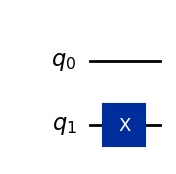

Deutsch-Jozsa Circuit:


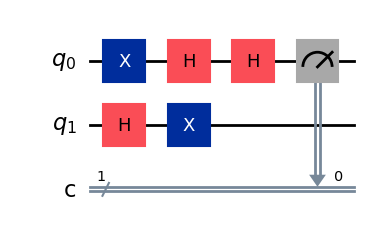

Measurement Result: {'1': 1024}


In [6]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random
import matplotlib.pyplot as plt

# ---------------------------
# 1. Define Oracle Gates
# ---------------------------
def deutsch_jozsa_oracle(f_type):
    oracle = QuantumCircuit(2)
    
    if f_type == "constant_0":
        pass
    elif f_type == "constant_1":
        oracle.x(1)
    elif f_type == "balanced_identity":
        oracle.cx(1, 0)
    elif f_type == "balanced_not":
        oracle.x(0)
        oracle.cx(0, 1)
    
    return oracle

# ---------------------------
# 2. Create Deutsch-Jozsa Circuit
# ---------------------------
def deutsch_jozsa_circuit(oracle):
    dj = QuantumCircuit(2, 1)
    dj.x(0)
    dj.h([0, 1])
    
    # Compose the oracle instead of append
    dj = dj.compose(oracle, [0, 1])
    
    dj.h(0)
    dj.measure(0, 0)
    return dj

# ---------------------------
# 3. Test Implementation
# ---------------------------
function_type = random.choice(["constant_0", "constant_1", "balanced_identity", "balanced_not"])
print(f"Chosen function: {function_type}")

oracle_circ = deutsch_jozsa_oracle(function_type)
print("Quantum Circuit of the Oracle:")
display(oracle_circ.draw('mpl'))

dj_circ = deutsch_jozsa_circuit(oracle_circ)
print("Deutsch-Jozsa Circuit:")
display(dj_circ.draw('mpl'))

# ---------------------------
# 4. Run on simulator
# ---------------------------
simulator = AerSimulator()
job = simulator.run(dj_circ, shots=1024)
result = job.result()
counts = result.get_counts()

print("Measurement Result:", counts)
plot_histogram(counts)
plt.show()


**Inference**
- Deutsch-Jozsa algorithm identifies constant vs balanced functions in one evaluation.

- Qubits are initialized with Hadamard gates to create superposition.

- The oracle encodes the chosen function.

- Hadamard gates after the oracle enable interference of amplitudes.

- Measuring the first qubit gives 0 for constant, 1 for balanced.

- Simulation confirms correct function classification.